<a href="https://colab.research.google.com/github/vankired/ANKIREDDY_IT533/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity
kickstart = pd.read_csv("https://raw.githubusercontent.com/vankired/ANKIREDDY_IT533/main/kickstarter-projects-201518.csv", encoding="ISO-8859-1")
kickstart.dropna(inplace=True)


In [3]:
kickstart

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1008941852,The return of BABY UNIVERSE!,Immersive,Theater,USD,1/1/2015,15000,12/4/2014 21:37,11880.18,failed,46,US,11880.18,11880.18,15000.00
1,1013503401,Potjie,Drama,Film & Video,GBP,1/1/2015,4500,12/2/2014 18:10,4843.00,successful,67,GB,7560.32,7477.46,6947.88
2,1020446396,Stilt City- A Bungalow Artist Space in The Roc...,Public Art,Art,USD,1/1/2015,60000,11/19/2014 23:14,18087.00,canceled,204,US,18087.00,18087.00,60000.00
3,1028008131,A 2D SideScroller RPG Made by YOU (Canceled),Video Games,Games,USD,1/1/2015,20000,12/2/2014 22:02,9.00,canceled,2,US,9.00,9.00,20000.00
4,1049544313,Balteus Belt,Apparel,Fashion,USD,1/1/2015,8000,11/18/2014 21:17,1563.00,failed,16,US,1563.00,1563.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191580,55596200,Plateforme de statistiques,Apps,Technology,EUR,3/2/2018,9000,1/1/2018 15:40,0.00,live,0,FR,0.00,0.00,10923.26
191581,872683023,The Lewisham Ledger - a new free local communi...,Print,Journalism,GBP,3/2/2018,5000,1/1/2018 21:20,350.00,live,7,GB,364.86,477.39,6819.89
191582,1036415983,Aikyam : Onnu,Music,Music,USD,3/3/2018,10000,1/2/2018 8:11,174.00,live,3,US,174.00,174.00,10000.00
191583,1916988520,Back in Black Hills Movie,Drama,Film & Video,USD,3/3/2018,5500,1/2/2018 1:16,0.00,live,0,US,0.00,0.00,5500.00


In [6]:
k = kickstart.rename(columns={'usd pledged': 'usd_pledged'})
k

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1008941852,The return of BABY UNIVERSE!,Immersive,Theater,USD,1/1/2015,15000,12/4/2014 21:37,11880.18,failed,46,US,11880.18,11880.18,15000.00
1,1013503401,Potjie,Drama,Film & Video,GBP,1/1/2015,4500,12/2/2014 18:10,4843.00,successful,67,GB,7560.32,7477.46,6947.88
2,1020446396,Stilt City- A Bungalow Artist Space in The Roc...,Public Art,Art,USD,1/1/2015,60000,11/19/2014 23:14,18087.00,canceled,204,US,18087.00,18087.00,60000.00
3,1028008131,A 2D SideScroller RPG Made by YOU (Canceled),Video Games,Games,USD,1/1/2015,20000,12/2/2014 22:02,9.00,canceled,2,US,9.00,9.00,20000.00
4,1049544313,Balteus Belt,Apparel,Fashion,USD,1/1/2015,8000,11/18/2014 21:17,1563.00,failed,16,US,1563.00,1563.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191580,55596200,Plateforme de statistiques,Apps,Technology,EUR,3/2/2018,9000,1/1/2018 15:40,0.00,live,0,FR,0.00,0.00,10923.26
191581,872683023,The Lewisham Ledger - a new free local communi...,Print,Journalism,GBP,3/2/2018,5000,1/1/2018 21:20,350.00,live,7,GB,364.86,477.39,6819.89
191582,1036415983,Aikyam : Onnu,Music,Music,USD,3/3/2018,10000,1/2/2018 8:11,174.00,live,3,US,174.00,174.00,10000.00
191583,1916988520,Back in Black Hills Movie,Drama,Film & Video,USD,3/3/2018,5500,1/2/2018 1:16,0.00,live,0,US,0.00,0.00,5500.00


In [ ]:
#Cosine Similarity 

converting attributes to numpy arrays


In [7]:
a = np.array(k.backers)
b = np.array(k.usd_pledged)


NOw we will compute cosine similarity for backers and usd_pledged

In [8]:
dot = np.dot(a, b)  
norma = np.linalg.norm(a)  
normb = np.linalg.norm(b)  
cos1 = dot / (norma * normb)  


We must now calculate the angle from the cosine. There are two steps to this:
1. Convert the angle in radians

2: Determine the degrees

In [9]:
angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)
print("Values from Manually computing cosine similarity for backers and usd_pledged.\n")
print("Cosine Similarity for backers and usd_pledged attributes is ", cos1)
print("Angle of radians for backers and usd_pledged attributes is ", angle_in_radians1)
print("Angle in degrees for backers and usd_pledged attributes is ", angle_in_radians1)
print("\n \n")

Values from Manually computing cosine similarity for backers and usd_pledged.

Cosine Similarity for backers and usd_pledged attributes is  0.6396942787910601
Angle of radians for backers and usd_pledged attributes is  0.8766958755316404
Angle in degrees for backers and usd_pledged attributes is  0.8766958755316404

 



In [ ]:
## Calculations between backers and usd pledged characteristics using the COSINE SIMILARITY FUNCTION from sklearn.metrics

In [10]:
aa = a.reshape(1,188445) 
ba = b.reshape(1,188445) 
cos2 = cosine_similarity(aa, ba)

In [ ]:
#To get the degrees, we need to convert the angle to radians.

In [14]:
angle_in_radians2 = math.acos(cos2)
degrees2 = math.degrees(angle_in_radians2)
print("Values after performing the calculations with the cosine_similarity function from sklearn.metrics\n")
print("Cosine Similarity for backers and usd_pledged attributes is ", cos2)
print("Angle of radians for backers and usd_pledged attributes is ", angle_in_radians2)
print("Angle in degrees for backers and usd_pledged attributes is ", angle_in_radians2)

Values after performing the calculations with the cosine_similarity function from sklearn.metrics

Cosine Similarity for backers and usd_pledged attributes is  [[0.63969428]]
Angle of radians for backers and usd_pledged attributes is  0.8766958755316401
Angle in degrees for backers and usd_pledged attributes is  0.8766958755316401


Usd pledged and usd pledged real have a cosine similarity.

In [15]:
# First, two properties are converted to numpy arrays.
a = np.array(k.usd_pledged)
b = np.array(k.usd_pledged_real)


In [17]:
#Cosine similarity for usd pledged and usd pledged real is manually computed.
dot = np.dot(a, b)  
norma = np.linalg.norm(a) 
normb = np.linalg.norm(b)  
cos1 = dot / (norma * normb)  

In [18]:
# Next, we'll calculate the angle from the cosine. There are two steps to this:
#1. Convert the angle in radians.
# 2: Determine the degrees.
angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)
print("Values from Manually computing cosine similarity for usd_pledged and usd_pledged_real.\n")
print("Cosine Similarity for usd_pledged and usd_pledged_real attributes is ", cos1)
print("Angle of radians for usd_pledged and usd_pledged_real attributes is ", angle_in_radians1)
print("Angle in degrees for usd_pledged and usd_pledged_real attributes is ", angle_in_radians1)
print("\n \n")

Values from Manually computing cosine similarity for usd_pledged and usd_pledged_real.

Cosine Similarity for usd_pledged and usd_pledged_real attributes is  0.869223908942273
Angle of radians for usd_pledged and usd_pledged_real attributes is  0.5171658830833838
Angle in degrees for usd_pledged and usd_pledged_real attributes is  0.5171658830833838

 



In [19]:
# Calculations between backers and usd pledged characteristics using the COSINE SIMILARITY FUNCTION from sklearn.metrics
aa = a.reshape(1,188445) 
ba = b.reshape(1,188445) 
cos2 = cosine_similarity(aa, ba)


In [20]:
# To get the degrees, we need to convert the angle to radians.
angle_in_radians2 = math.acos(cos2)
degrees2 = math.degrees(angle_in_radians2)
print("Values after performing the calculations with the cosine_similarity function from sklearn.metrics\n")
print("Cosine Similarity for usd_pledged and usd_pledged_real attributes is ", cos2)
print("Angle of radians for usd_pledged and usd_pledged_real attributes is ", angle_in_radians2)
print("Angle in degrees for usd_pledged and usd_pledged_real attributes is ", angle_in_radians2)


Values after performing the calculations with the cosine_similarity function from sklearn.metrics

Cosine Similarity for usd_pledged and usd_pledged_real attributes is  [[0.86922391]]
Angle of radians for usd_pledged and usd_pledged_real attributes is  0.5171658830833864
Angle in degrees for usd_pledged and usd_pledged_real attributes is  0.5171658830833864


2. **Chi-Square**


In [21]:
# Note that pd.crosstab creates a two-way table. 
# We can even format the result with a print command:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(k.name, k.main_category).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')
#pd.crosstab(k.name, k.main_category)



Chi-square Statistic: 2631041.507218438 ,p-value: 3.2034357831679806e-05, Degrees of Freedom: 2621878


Both variables are independent if the p-value is greater than 0.05.
Both variables are dependent if the p-value is less than 0.05.
Here,

p-value: 3.2034357831679806e-05 = 0.02158458052 < 0.05

In [23]:
#The attributes name and main category are mutually exclusive.
# Note that pd.crosstab creates a two-way table. 
# We can even format the result with a print command:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(k.name, k.state).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')
#pd.crosstab(k.name, k.main_category)


Chi-square Statistic: 749379.2043755101 ,p-value: 0.41212302046942356, Degrees of Freedom: 749108


Both variables are independent if the p-value is greater than 0.05.
Both variables are dependent if the p-value is less than 0.05.
3.2034357831679806e-05 = 0.41212302046942356 0.05 p-value
Name and state are two distinct attributes.

3. **Covariance and Correlation**

In [24]:
corr = k.corr()
corr

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.000366,0.001940,0.002565,0.000422,0.001220,0.000488
goal,0.000366,1.000000,0.004796,0.000134,0.002243,0.001709,0.936802
pledged,0.001940,0.004796,1.000000,0.690055,0.804124,0.936643,0.001670
backers,0.002565,0.000134,0.690055,1.000000,0.637138,0.735122,0.000535
usd_pledged,0.000422,0.002243,0.804124,0.637138,1.000000,0.868505,0.002640
usd_pledged_real,0.001220,0.001709,0.936643,0.735122,0.868505,1.000000,0.002051
usd_goal_real,0.000488,0.936802,0.001670,0.000535,0.002640,0.002051,1.000000


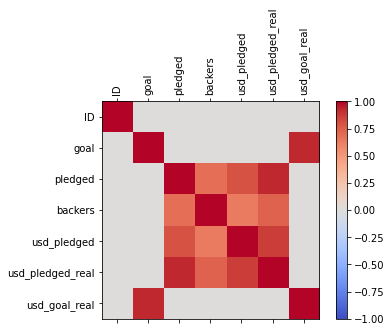

In [25]:
# Using pyplot, we can now create a nice correlation heatmap.
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()